<a href="https://colab.research.google.com/github/jakes1811/Flight-Delay-Prediction/blob/main/Flight_delay_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

data = pd.read_csv("/content/flight_delay_predict.csv")
data.head()

,is_delay,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,AirTime
0,1.0,2014,1,1,1,3,2014-01-01,UA,LAX,CA,ORD,IL,900.0,0.0,0.0,1744.0,7.0,43.0,43.0,218.0
1,0.0,2014,1,1,1,3,2014-01-01,AA,IAH,TX,DFW,TX,1750.0,0.0,0.0,224.0,1.0,2.0,2.0,50.0
2,1.0,2014,1,1,1,3,2014-01-01,AA,LAX,CA,ORD,IL,1240.0,0.0,0.0,1744.0,7.0,26.0,26.0,220.0
3,1.0,2014,1,1,1,3,2014-01-01,AA,DFW,TX,LAX,CA,1905.0,0.0,0.0,1235.0,5.0,159.0,159.0,169.0
4,0.0,2014,1,1,1,3,2014-01-01,AA,DFW,TX,CLT,NC,1115.0,0.0,0.0,936.0,4.0,-13.0,0.0,108.0


In [3]:
avg_delay_by_origin = data.groupby('Origin')['ArrDelay'].mean().reset_index()

bar_plot = px.bar(avg_delay_by_origin, x='Origin', y='ArrDelay', title='Average Arrival Delay by Origin Airport')
bar_plot.update_layout(xaxis_title='Origin Airport', yaxis_title='Average Arrival Delay')

bar_plot.show()

In [4]:
avg_delay_by_dest = data.groupby('Dest')['ArrDelay'].mean().reset_index()

bar_plot_dest = px.bar(avg_delay_by_dest, x='Dest', y='ArrDelay', title='Average Arrival Delay by Destination Airport')
bar_plot_dest.update_layout(xaxis_title='Destination Airport', yaxis_title='Average Arrival Delay')

bar_plot_dest.show()

<Axes: >

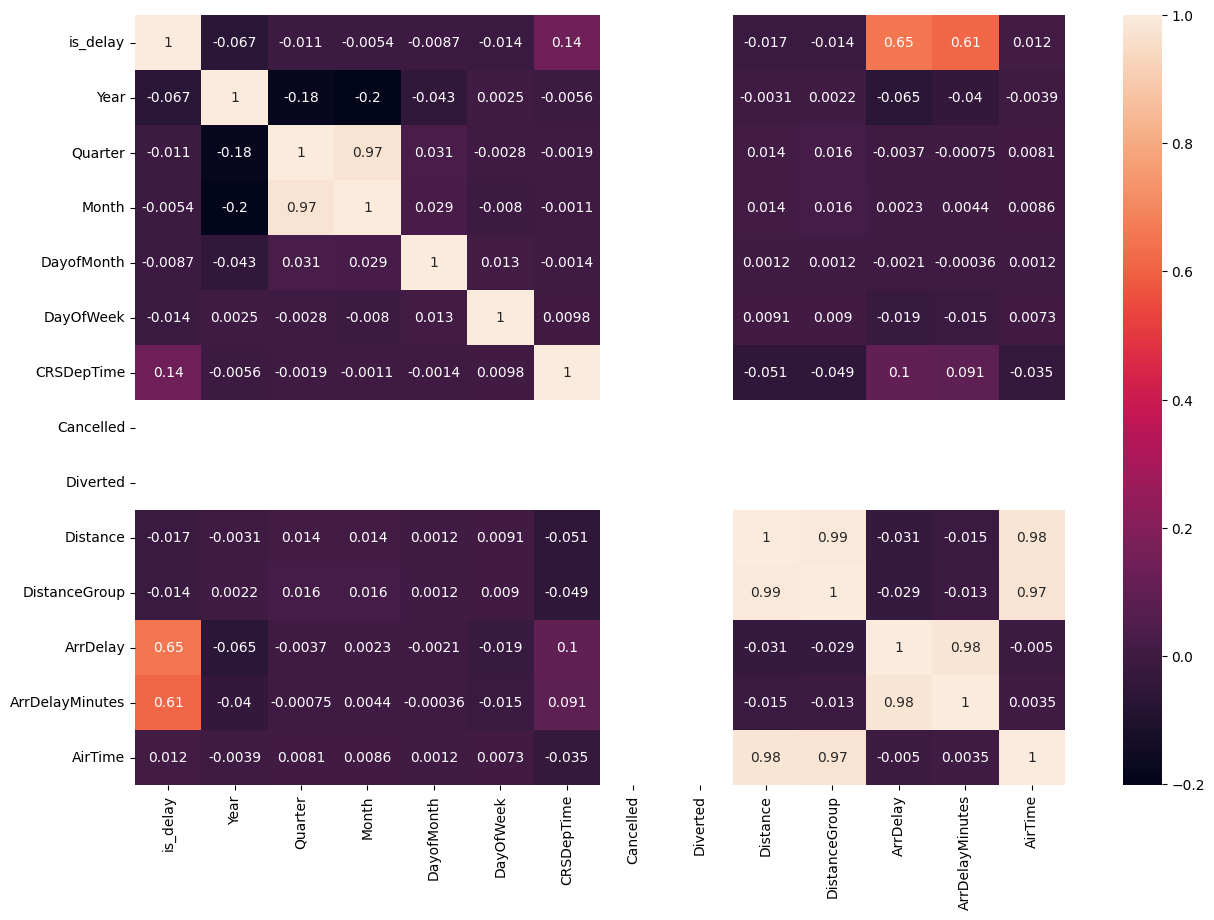

In [5]:
numeric_data = data.select_dtypes(include=['number'])

corr_matrix = numeric_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot = True)

In [6]:
data['FlightDate'] = pd.to_datetime(data['FlightDate'])

avg_delay_month = data.groupby(data['FlightDate'].dt.month)['is_delay'].mean().reset_index()
fig = px.bar(avg_delay_month, x='FlightDate', y='is_delay', labels={'FlightDate': 'Month',
'is_delay': 'Average Delay'},
             title='Average Delay by Month')
fig.update_traces(marker_color='lightseagreen')
fig.show()

In [7]:
X = data[['AirTime', 'Distance']]
y = data[['ArrDelayMinutes', 'is_delay']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)
score, accuracy = model.evaluate(X_test, y_test, verbose=0)

model.save('/kaggle/working/test.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/5
15944/15944 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.9980 - loss: 744.2371
Epoch 2/5
15944/15944 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 1.0000 - loss: 707.9142
Epoch 3/5
15944/15944 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 1.0000 - loss: 719.1351
Epoch 4/5
15944/15944 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 1.0000 - loss: 707.6144
Epoch 5/5
15944/15944 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 1.0000 - loss: 722.5798


In [9]:
air_time = float(input("Enter Air Time in minutes: "))
distance = float(input("Enter Distance in miles: "))
user_input = np.array([[air_time, distance]])
user_input_scaled = scaler.transform(user_input)
predictions = model.predict(user_input_scaled)
if predictions[0][1] >= 0.5:
    print(f"The flight is delayed by {predictions[0][0]} minutes.")
else:
    print("The flight is not delayed.")

Enter Air Time in minutes: 300
Enter Distance in miles: 2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
The flight is not delayed.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

